In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
from tensorflow.keras.datasets import mnist

In [7]:
(X_train,Y_train),(X_test,Y_test) = mnist.load_data()

In [8]:
X_train.shape

(60000, 28, 28)

In [9]:
X_test.shape

(10000, 28, 28)

In [10]:
X_train[200]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  29, 197,
        255,  84,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  85, 251,
        253,  83,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

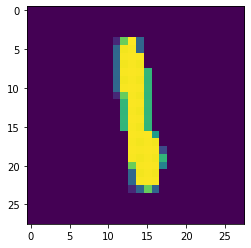

In [12]:
plt.imshow(X_train[200])

In [13]:
Y_train, Y_test

(array([5, 0, 4, ..., 5, 6, 8], dtype=uint8),
 array([7, 2, 1, ..., 4, 5, 6], dtype=uint8))

### Now lets convert Y (output) values to categorical featues

In [14]:
from tensorflow.keras.utils import to_categorical

In [16]:
Y_cat_train = to_categorical(Y_train, num_classes=10)

In [17]:
Y_cat_test = to_categorical(Y_test, num_classes=10)

In [18]:
Y_cat_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

### Now lets scale the images using MinMax Scaler

In [19]:
X_train[200].max()

255

In [20]:
X_train[200].min()

0

In [21]:
#So we know now that Max value of pixel is 255 and Min value is 0

In [22]:
X_train = X_train/255
X_test = X_test/255

In [24]:
X_train[200]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

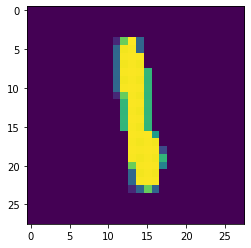

In [25]:
plt.imshow(X_train[200])

### Now after scaling we need to reshape our images to take account for the RGB channel

In [26]:
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

In [27]:
X_train[200]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

(28, 28, 1)

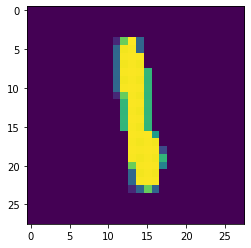

In [30]:
plt.imshow(X_train[200])
X_train[200].shape

### Now lets build our CNN Model

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [37]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=X_train[200].shape, activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(units=128, activation='relu')) #Units=128 is random number
model.add(Dense(units=10, activation='softmax')) #Units=10 cause we have 10 class, activation=softmax since we have to predict calss probability
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [38]:
'''
Flatten: 28*28=764
Convert 2D to 1D
Cause we cannot feed images in 28*28 format
We send 1D format
'''

'\nFlatten: 28*28=764\nConvert 2D to 1D\nCause we cannot feed images in 28*28 format\nWe send 1D format\n'

In [39]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               589952    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_________________________________________________________________


#### Lets add early stopping for our model parameters to stop early to prevent overfitting and reduce training time 

In [40]:
from tensorflow.keras.callbacks import EarlyStopping

In [41]:
early_stop = EarlyStopping(monitor='val_loss', patience=4)

### Now as we have set the model prarameters lets TRAIN the model 

In [42]:
model.fit(X_train, Y_cat_train, epochs=50, validation_data=(X_test, Y_cat_test), callbacks=[early_stop])

Epoch 1/50
1875/1875 [==============================] - 10s 2ms/step - loss: 0.1390 - accuracy: 0.9588 - val_loss: 0.0484 - val_accuracy: 0.9838
Epoch 2/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0479 - accuracy: 0.9851 - val_loss: 0.0430 - val_accuracy: 0.9857
Epoch 3/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0311 - accuracy: 0.9905 - val_loss: 0.0417 - val_accuracy: 0.9873
Epoch 4/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0199 - accuracy: 0.9940 - val_loss: 0.0373 - val_accuracy: 0.9888
Epoch 5/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0140 - accuracy: 0.9956 - val_loss: 0.0399 - val_accuracy: 0.9882
Epoch 6/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0111 - accuracy: 0.9963 - val_loss: 0.0442 - val_accuracy: 0.9867
Epoch 7/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0078 - accuracy: 0.9973 - val_loss: 0.0414 - val_accuracy

In [43]:
model.metrics

In [44]:
model.metrics_names

['loss', 'accuracy']

In [46]:
model.history.history

{'loss': [0.138982355594635,
  0.04790351539850235,
  0.031091010197997093,
  0.01988963596522808,
  0.014003371819853783,
  0.01109424326568842,
  0.007790530566126108,
  0.006742865778505802],
 'accuracy': [0.9588000178337097,
  0.9850999712944031,
  0.9905333518981934,
  0.9939500093460083,
  0.9955833554267883,
  0.9962666630744934,
  0.9973333477973938,
  0.9977166652679443],
 'val_loss': [0.048442546278238297,
  0.04302510619163513,
  0.04173567146062851,
  0.03726761043071747,
  0.03994568809866905,
  0.044239673763513565,
  0.041422463953495026,
  0.05167708173394203],
 'val_accuracy': [0.9837999939918518,
  0.9857000112533569,
  0.9872999787330627,
  0.9887999892234802,
  0.9882000088691711,
  0.9866999983787537,
  0.987500011920929,
  0.9861999750137329]}

In [47]:
losses = pd.DataFrame(model.history.history)

In [48]:
losses

,loss,accuracy,val_loss,val_accuracy
0,0.138982,0.958800,0.048443,0.9838
1,0.047904,0.985100,0.043025,0.9857
2,0.031091,0.990533,0.041736,0.9873
3,0.019890,0.993950,0.037268,0.9888
4,0.014003,0.995583,0.039946,0.9882
5,0.011094,0.996267,0.044240,0.9867
6,0.007791,0.997333,0.041422,0.9875
7,0.006743,0.997717,0.051677,0.9862


<AxesSubplot:>

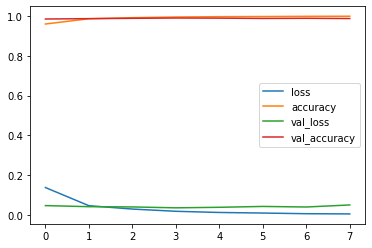

In [49]:
losses.plot()

<AxesSubplot:>

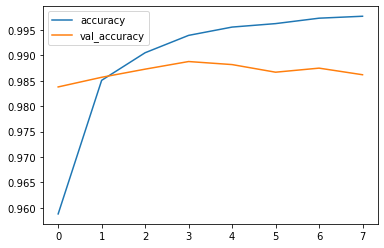

In [51]:
losses[['accuracy','val_accuracy']].plot()

<AxesSubplot:>

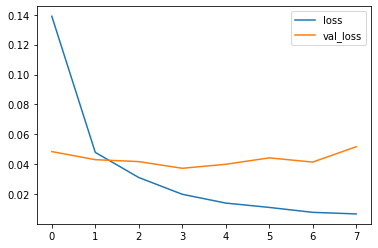

In [52]:
losses[['loss','val_loss']].plot()

### Now lets evaluate the Metrics of the Model

In [53]:
from sklearn.metrics import classification_report, confusion_matrix

In [59]:
#Predictions
predictions = model.predict(X_test)

In [57]:
predictions

array([[1.9034360e-13, 7.9771266e-11, 2.6974525e-11, ..., 1.0000000e+00,
        3.1377041e-12, 4.4615190e-11],
       [2.1539791e-11, 1.3783153e-07, 9.9999988e-01, ..., 1.2739990e-15,
        5.1671861e-11, 7.7099993e-12],
       [1.2486516e-08, 9.9999952e-01, 6.1572103e-09, ..., 4.0574798e-07,
        3.6247513e-08, 2.9980185e-11],
       ...,
       [5.7570911e-20, 1.9778725e-12, 2.7182567e-18, ..., 7.0330922e-11,
        1.0884957e-08, 2.0501438e-09],
       [1.6585852e-11, 2.4382007e-12, 4.3672481e-15, ..., 2.1499838e-10,
        7.0391707e-03, 2.4784964e-12],
       [2.0618403e-14, 2.5663152e-14, 5.8079344e-13, ..., 3.9447342e-18,
        3.2088759e-14, 3.5614246e-15]], dtype=float32)

In [60]:
classes_predictions=np.argmax(predictions,axis=1)
classes_predictions

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [61]:
print(confusion_matrix(classes_predictions, Y_test))

[[ 976    0    0    0    0    2    6    0    3    3]
 [   0 1127    1    0    0    0    4    0    0    0]
 [   1    1 1020    1    0    1    0    5    3    0]
 [   0    0    0  999    0    9    0    0    1    1]
 [   0    0    0    0  957    0    1    0    0    3]
 [   0    0    0    1    0  869    0    0    0    1]
 [   2    1    1    0    6    5  945    0    0    0]
 [   1    2    6    3    2    1    0 1017    3    8]
 [   0    4    4    4    3    4    2    1  959    0]
 [   0    0    0    2   14    1    0    5    5  993]]


In [62]:
import seaborn as sns

<AxesSubplot:>

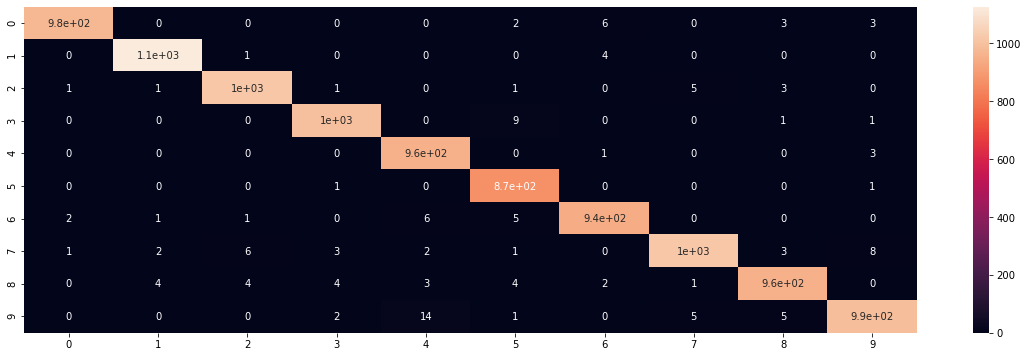

In [67]:
plt.figure(figsize=(20,6))
sns.heatmap(data=confusion_matrix(classes_predictions, Y_test), annot=True)